# TVshows_Analysis

### Data Preprocessing 

 #### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
data = pd.read_csv('tv_shows.csv',index_col=[0])
data.head() 

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [3]:
data.shape

(5611, 10)

In [4]:
data.describe()

,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,type
count,5611.000000,4450.000000,5611.000000,5611.000000,5611.000000,5611.000000,5611.0
mean,2011.021030,7.113258,0.344145,0.312600,0.382107,0.032080,1.0
std,11.005116,1.132060,0.475131,0.463594,0.485946,0.176228,0.0
min,1901.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2010.000000,6.600000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2015.000000,7.300000,0.000000,0.000000,0.000000,0.000000,1.0
75%,2017.000000,7.900000,1.000000,1.000000,1.000000,0.000000,1.0
max,2020.000000,9.600000,1.000000,1.000000,1.000000,1.000000,1.0


In [5]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5606    False
5607    False
5608    False
5609    False
5610    False
Length: 5611, dtype: bool

### find The Null Velue

In [6]:
data.isnull().sum()

Title                 0
Year                  0
Age                2446
IMDb               1161
Rotten Tomatoes    4600
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
type                  0
dtype: int64

<AxesSubplot:>

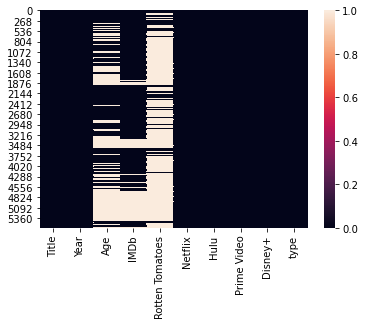

In [7]:
sns.heatmap(data.isnull())

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

Title              0
Year               0
Age                0
IMDb               0
Rotten Tomatoes    0
Netflix            0
Hulu               0
Prime Video        0
Disney+            0
type               0
dtype: int64

In [10]:
data.shape

(931, 10)

In [11]:
data.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [12]:
data.dtypes

Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
type                 int64
dtype: object

# Q-1 What Are The Top-10 High rated Movies on Rotten Tomatoes

In [13]:
data.rename(columns={'Rotten Tomatoes' : 'RottenTomatoes'},inplace=True)

In [14]:
data.head()

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [15]:
data['RottenTomatoes'] = data.RottenTomatoes.apply(lambda x : x.replace('%',' ') ).astype("int64")

In [16]:
data.head()

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97,1,0,0,0,1


In [17]:
data.RottenTomatoes.dtypes

dtype('int64')

In [18]:
data.sort_values(by='RottenTomatoes',ascending=False)


,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,type
89,Fauda,2015,16+,8.3,100,1,0,0,0,1
742,Final Fantasy XIV: Dad of Light,2017,7+,7.2,100,1,0,0,0,1
1972,Black Books,2000,7+,8.5,100,0,1,1,0,1
2025,Inside No. 9,2014,18+,8.5,100,0,1,0,0,1
92,Big Mouth,2017,18+,8.0,100,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5506,Marvel's Inhumans,2017,7+,5.0,11,0,0,0,1,1
2540,Rosewood,2015,16+,6.7,9,0,1,0,0,1
2958,Saved by the Bell: The College Years,1993,7+,6.3,9,0,1,0,0,1
840,The I-Land,2019,18+,4.5,8,1,0,0,0,1


In [19]:
data[data.RottenTomatoes == 100].count()

Title             95
Year              95
Age               95
IMDb              95
RottenTomatoes    95
Netflix           95
Hulu              95
Prime Video       95
Disney+           95
type              95
dtype: int64

In [20]:
ToptenRT = data.sort_values(by='RottenTomatoes',ascending=False).head(10)

In [21]:
ToptenRT.head(10)

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,type
89,Fauda,2015,16+,8.3,100,1,0,0,0,1
742,Final Fantasy XIV: Dad of Light,2017,7+,7.2,100,1,0,0,0,1
1972,Black Books,2000,7+,8.5,100,0,1,1,0,1
2025,Inside No. 9,2014,18+,8.5,100,0,1,0,0,1
92,Big Mouth,2017,18+,8.0,100,1,0,0,0,1
238,Voltron: Legendary Defender,2016,7+,8.1,100,1,0,0,0,1
1981,Steins;Gate,2011,16+,8.8,100,0,1,0,0,1
2414,Spy,2011,7+,7.9,100,0,1,0,0,1
2908,Sherman's Showcase,2019,18+,5.4,100,0,1,0,0,1
202,Soul Eater,2008,16+,7.8,100,1,1,0,0,1


In [22]:
ToptenRT[['Title', 'Year','RottenTomatoes']]

,Title,Year,RottenTomatoes
89,Fauda,2015,100
742,Final Fantasy XIV: Dad of Light,2017,100
1972,Black Books,2000,100
2025,Inside No. 9,2014,100
92,Big Mouth,2017,100
238,Voltron: Legendary Defender,2016,100
1981,Steins;Gate,2011,100
2414,Spy,2011,100
2908,Sherman's Showcase,2019,100
202,Soul Eater,2008,100


# Q-2 What Are The Top-10 High rated Movies on IMDb

In [23]:
data.sort_values(by='IMDb',ascending=False)


,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96,1,0,0,0,1
3567,Band of Brothers,2001,18+,9.4,94,0,0,1,0,1
91,Our Planet,2019,7+,9.3,93,1,0,0,0,1
3566,The Wire,2002,18+,9.3,94,0,0,1,0,1
1931,Rick and Morty,2013,18+,9.2,94,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2692,The Hills,2006,7+,3.5,52,0,1,1,0,1
2983,I Am Cait,2015,16+,3.5,86,0,1,0,0,1
2677,The Bachelorette,2003,16+,3.4,62,0,1,0,0,1
1498,The Goop Lab,2020,18+,2.3,31,1,0,0,0,1


In [24]:
data[data.RottenTomatoes == 10].count()

Title             0
Year              0
Age               0
IMDb              0
RottenTomatoes    0
Netflix           0
Hulu              0
Prime Video       0
Disney+           0
type              0
dtype: int64

In [25]:
ToptenIMDb = data.sort_values(by='IMDb',ascending=False).head(10)

In [26]:
ToptenIMDb.head(10)

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96,1,0,0,0,1
3567,Band of Brothers,2001,18+,9.4,94,0,0,1,0,1
91,Our Planet,2019,7+,9.3,93,1,0,0,0,1
3566,The Wire,2002,18+,9.3,94,0,0,1,0,1
1931,Rick and Morty,2013,18+,9.2,94,0,1,0,0,1
3568,The Sopranos,1999,18+,9.2,92,0,0,1,0,1
9,Avatar: The Last Airbender,2005,7+,9.2,100,1,0,0,0,1
15,Fullmetal Alchemist: Brotherhood,2009,18+,9.1,100,1,1,0,0,1
3,Sherlock,2010,16+,9.1,78,1,0,0,0,1
3649,The Planets,2019,all,9.1,100,0,0,1,0,1


In [27]:
ToptenIMDb[['Title', 'Year','IMDb']]

,Title,Year,IMDb
0,Breaking Bad,2008,9.5
3567,Band of Brothers,2001,9.4
91,Our Planet,2019,9.3
3566,The Wire,2002,9.3
1931,Rick and Morty,2013,9.2
3568,The Sopranos,1999,9.2
9,Avatar: The Last Airbender,2005,9.2
15,Fullmetal Alchemist: Brotherhood,2009,9.1
3,Sherlock,2010,9.1
3649,The Planets,2019,9.1


# Q-3 How Many Movies Have a 18+ restriction ?

In [28]:
data[data['Age'] == '18+'].count()

Title             376
Year              376
Age               376
IMDb              376
RottenTomatoes    376
Netflix           376
Hulu              376
Prime Video       376
Disney+           376
type              376
dtype: int64

# Q-4 How Manyy Movies Have >=5 rating an relesd in 2010 ?

In [29]:
data[(data['IMDb'] >= 5) & (data['Year'] == 2010)].count()

Title             24
Year              24
Age               24
IMDb              24
RottenTomatoes    24
Netflix           24
Hulu              24
Prime Video       24
Disney+           24
type              24
dtype: int64

# Q-5 How Many Age Categorys? 

In [30]:
 data['Age'].unique()

array(['18+', '16+', '7+', 'all', '13+'], dtype=object)

In [31]:
Age_grups = data.groupby('Age').Title.count()

In [32]:
Age_grups

Age
13+      3
16+    359
18+    376
7+     177
all     16
Name: Title, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

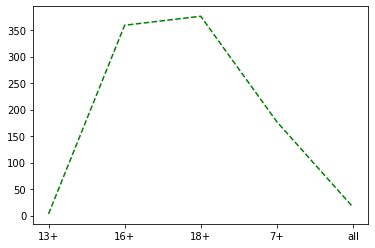

In [33]:
plt.plot(Age_grups,'g--')
plt.xlabel = ('AgeGroups')
plt.ylabel = ('Number Of Movie')
plt.show

# Q-6 Number Of Moies Categorized by Age Restriction before 2000 And Afrter 2000

In [34]:
data.head()

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97,1,0,0,0,1


In [35]:
years = data['Year'].unique()

In [36]:
years

array([2008, 2016, 2017, 2010, 2015, 2005, 2011, 2013, 2009, 2006, 2019,
       1990, 2014, 2018, 2007, 2003, 2020, 1999, 2012, 1959, 1987, 1966,
       2000, 1995, 1969, 1998, 1993, 1988, 2004, 1992, 2001, 1989, 2002,
       1997, 1991, 1981, 1963, 1978, 1964], dtype=int64)

In [37]:
years.min()

1959

In [38]:
years.max()

2020

In [39]:
before2000 = data[(data['Year'] <= 2000)]

In [40]:
before2000.count()

Title             60
Year              60
Age               60
IMDb              60
RottenTomatoes    60
Netflix           60
Hulu              60
Prime Video       60
Disney+           60
type              60
dtype: int64

In [41]:
after2000 = data[(data['Year'] > 2000)]

In [42]:
after2000.count()

Title             871
Year              871
Age               871
IMDb              871
RottenTomatoes    871
Netflix           871
Hulu              871
Prime Video       871
Disney+           871
type              871
dtype: int64

In [43]:
MovieBefore2000 = before2000.groupby("Age").Title.count()

In [44]:
MovieBefore2000

Age
13+     1
16+    14
18+    13
7+     27
all     5
Name: Title, dtype: int64

In [45]:
MovieAfter2000 = after2000.groupby("Age").Title.count()

In [46]:
MovieAfter2000 

Age
13+      2
16+    345
18+    363
7+     150
all     11
Name: Title, dtype: int64